In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
%matplotlib inline

In [2]:
#read dataset using read csv function
data = pd.read_csv('C://Users//VISHAL//PycharmProjects//NeuralNetwork/iris_dataset_original.csv')
#print(data)
data.head()
print(data.keys())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


In [3]:
#Load the independent attriubutes and dependent attributes into dataframe 
X=pd.DataFrame(data,columns=(['sepal_length','petal_length']))
y=pd.DataFrame(data,columns=(['class']))

In [4]:
#Split the data into training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
#print(x_train)

In [5]:
#scikit learn BackPropagation model
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(x_train, np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 3), learning_rate='constant',
       learning_rate_init=0.1, max_iter=150, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [6]:
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

Training set score: 0.983333
Test set score: 0.933333


In [7]:
#Prdict the flower class 
predictions = mlp.predict(x_test)
predictions
#Accuracy score for the prediction 
print(accuracy_score(y_test,predictions))

0.933333333333


In [10]:
#function to plot decision boundry 
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
  # print(X[:,0])
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # print(xx1)
   #print(xx1)
   #print((np.array([xx1.ravel(), xx2.ravel()]).T))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   print(np.unique(y))

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      #print(idx)
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)
 

[-1  0  1]


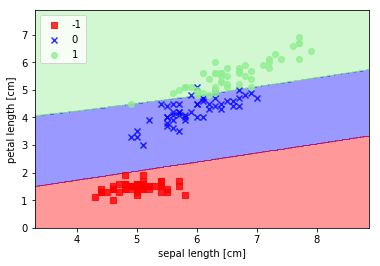

In [11]:
X = data.iloc[0:150, [0, 2]].values
#print(X)
y=data.iloc[0:150, 4].values
#print(y)
plot_decision_regions(X, y, classifier=mlp)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()   